In [6]:
import os,sys
import cv2
from PIL import Image
import tifffile as tiff
os.chdir(sys.path[0]) #使用文件所在目录
sys.path.append(os.getcwd()) #添加工作目录到模块搜索目录列表

import mrcfile
import numpy as np
import imageio
from os import path as osp

input_directory = "../../datasets/F-actin/F-actin_origin/"
wf_gt_directory = "../../datasets/F-actin/F-actin_wf_gt/"
sim_directory = "../../datasets/F-actin/F-actin_sim/"
gt_directory = "../../datasets/F-actin/F-actin_gt/"
directorys = os.listdir(input_directory)
#directorys
                


In [4]:
cd ..

/share/home/wangwb/Codes/mySRlib/BasicSR/scripts


In [7]:
# save in different folders
import imageio
for directory in directorys:

    # NOT a directory
    if(os.path.isdir(input_directory + directory) == False):
        continue

    wf_gt_dir = wf_gt_directory #+'Cell_'+ str(idx).zfill(3)
    sim_dir = sim_directory #+'Cell_'+ str(idx).zfill(3)
    gt_dir = gt_directory #+'Cell_'+ str(idx).zfill(3)

    input_paths = os.listdir(input_directory + directory + '/')

    for path in input_paths:

        if(os.path.exists(wf_gt_dir + directory) == False):
            os.mkdir(wf_gt_dir + directory)
        if(os.path.exists(sim_dir + directory) == False):
            os.mkdir(sim_dir + directory)
        if(os.path.exists(gt_dir + directory) == False):
            os.mkdir(gt_dir + directory)

        file_name = osp.basename(path)
        output_directory = ''
        if 'RawSIMData_gt' in file_name:
            output_directory = wf_gt_dir
        elif 'RawSIMData_level' in file_name:
            output_directory = sim_dir
        elif 'SIM_gt' in file_name:
            output_directory = gt_dir
            
        fmrc = mrcfile.open(input_directory + directory + '/'+ path, 'r', permissive=True)
        img = 1
        if(output_directory == gt_dir):
            img=fmrc.data
            imageio.imsave(output_directory + directory + '/' + osp.splitext(file_name)[0] + '.tif', img)
            # cv2会破坏格式
            #cv2.imwrite(output_directory + directory + '/' + osp.splitext(file_name)[0] + '.tif', img)
        else:
            for i in range(0, 9):
                img=fmrc.data[i]
                #print(output_directory + directory + '/' + osp.splitext(file_name)[0] + '_sample_' + str(i) + '.tif')
                #print(img)
                imageio.imsave(output_directory + directory + '/' + osp.splitext(file_name)[0] + '_sample_' + str(i) + '.tif', img)
                # cv2会破坏格式
                #cv2.imwrite(output_directory + directory + '/' + osp.splitext(file_name)[0] + '_sample_' + str(i) + '.tif', img)


../datasets/F-actin/F-actin_wf_gt/Cell_030
../datasets/F-actin/F-actin_wf_gt/Cell_030
../datasets/F-actin/F-actin_wf_gt/Cell_030
../datasets/F-actin/F-actin_wf_gt/Cell_030
../datasets/F-actin/F-actin_wf_gt/Cell_030


/home/wangweibo/anaconda3/envs/mySRlib/lib/python3.8/site-packages/mrcfile/mrcinterpreter.py:209: RuntimeWarning: Map ID string not found - not an MRC file, or file is corrupt
  warnings.warn(msg, RuntimeWarning)
/home/wangweibo/anaconda3/envs/mySRlib/lib/python3.8/site-packages/mrcfile/mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


../datasets/F-actin/F-actin_wf_gt/Cell_030
../datasets/F-actin/F-actin_wf_gt/Cell_030
../datasets/F-actin/F-actin_wf_gt/Cell_030
../datasets/F-actin/F-actin_wf_gt/Cell_030
../datasets/F-actin/F-actin_wf_gt/Cell_030
../datasets/F-actin/F-actin_wf_gt/Cell_030
../datasets/F-actin/F-actin_wf_gt/Cell_030
../datasets/F-actin/F-actin_wf_gt/Cell_030
../datasets/F-actin/F-actin_wf_gt/Cell_030
../datasets/F-actin/F-actin_wf_gt/Cell_015
../datasets/F-actin/F-actin_wf_gt/Cell_015
../datasets/F-actin/F-actin_wf_gt/Cell_015
../datasets/F-actin/F-actin_wf_gt/Cell_015
../datasets/F-actin/F-actin_wf_gt/Cell_015
../datasets/F-actin/F-actin_wf_gt/Cell_015
../datasets/F-actin/F-actin_wf_gt/Cell_015
../datasets/F-actin/F-actin_wf_gt/Cell_015
../datasets/F-actin/F-actin_wf_gt/Cell_015
../datasets/F-actin/F-actin_wf_gt/Cell_015
../datasets/F-actin/F-actin_wf_gt/Cell_015
../datasets/F-actin/F-actin_wf_gt/Cell_015
../datasets/F-actin/F-actin_wf_gt/Cell_015
../datasets/F-actin/F-actin_wf_gt/Cell_015
../datasets

In [2]:
# save in one folder
# Enture LR and HR tiff have the same name
import os,sys
import cv2
from PIL import Image
import tifffile as tiff
os.chdir(sys.path[0]) #使用文件所在目录
sys.path.append(os.getcwd()) #添加工作目录到模块搜索目录列表

import mrcfile
import numpy as np
import imageio
from os import path as osp

input_directory = "../../datasets/F-actin/F-actin_origin/"
output_LR_directory = "../../datasets/F-actin/F-actin_output/LR/"
output_HR_directory = "../../datasets/F-actin/F-actin_output/HR/"
directorys = os.listdir(input_directory)

for directory in directorys:

    # NOT a directory
    if(os.path.isdir(input_directory + directory) == False):
        continue

    files = os.listdir(input_directory + directory + '/')

    # save img_gt
    for file in files:
        if("SIM_gt" in osp.basename(file)):
            fmrc = mrcfile.open(input_directory + directory + '/'+ file, 'r', permissive=True)
            img_gt = fmrc.data
            break
    
    for file in files:
        file_name = osp.basename(file)
        fmrc = mrcfile.open(input_directory + directory + '/'+ file, 'r', permissive=True)
        # Enture HR & LR are same
        if("SIM_gt" in file_name):
            continue
        else:
            for i in range(0, 9):
                img=fmrc.data[i]
                imageio.imsave(output_LR_directory + osp.splitext(file_name)[0] + "_" + directory + '_sample_' + str(i) + '.tif', img)
                imageio.imsave(output_HR_directory + osp.splitext(file_name)[0] + "_" + directory + '_sample_' + str(i) + '.tif', img_gt)
                # cv2.imwrite(output_LR_directory + osp.splitext(file_name)[0] + "_" + directory + '_sample_' + str(i) + '.tif', img)
                # cv2.imwrite(output_HR_directory + osp.splitext(file_name)[0] + "_" + directory + '_sample_' + str(i) + '.tif', img_gt)

create_lmdb.py                    generate_meta_info.py
download_datasets.py              mrc2tiff.ipynb
extract_images_from_tfrecords.py  prepare_hifacegan_dataset.py
extract_subimages.py              regroup_reds_dataset.py


3027

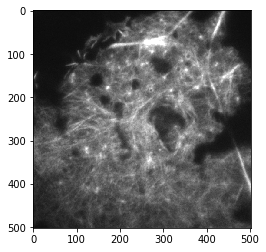

In [47]:
import matplotlib.pyplot as plt

testname='../../dataset/train/Cell_001/RawSIMData_gt_sample_0.tif'
plt.imshow(img,vmin=0,vmax=2065,cmap='gray')

np.max(img)

In [2]:
import mrcfile

fmrc_test0 = mrcfile.open("../datasets/F-actin/F-actin_origin/Cell_001/RawSIMData_gt.mrc", 'r', permissive=True)
fmrc_test1 = mrcfile.open("../datasets/F-actin/F-actin_origin/Cell_001/RawSIMData_level_03.mrc", 'r', permissive=True)
fmrc_test2 = mrcfile.open("../datasets/F-actin/F-actin_origin/Cell_001/SIM_gt.mrc", 'r', permissive=True)

print(fmrc_test0.data.size) #9*502*502
print(fmrc_test1.data.size) #9*502*502
print(fmrc_test2.data.size) #1004*1004

cv2.imwrite('123.tif', fmrc_test0.data[0])

2268036
2268036
1008016


/home/wangweibo/anaconda3/envs/mySRlib/lib/python3.8/site-packages/mrcfile/mrcinterpreter.py:209: RuntimeWarning: Map ID string not found - not an MRC file, or file is corrupt
  warnings.warn(msg, RuntimeWarning)
/home/wangweibo/anaconda3/envs/mySRlib/lib/python3.8/site-packages/mrcfile/mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


True